In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


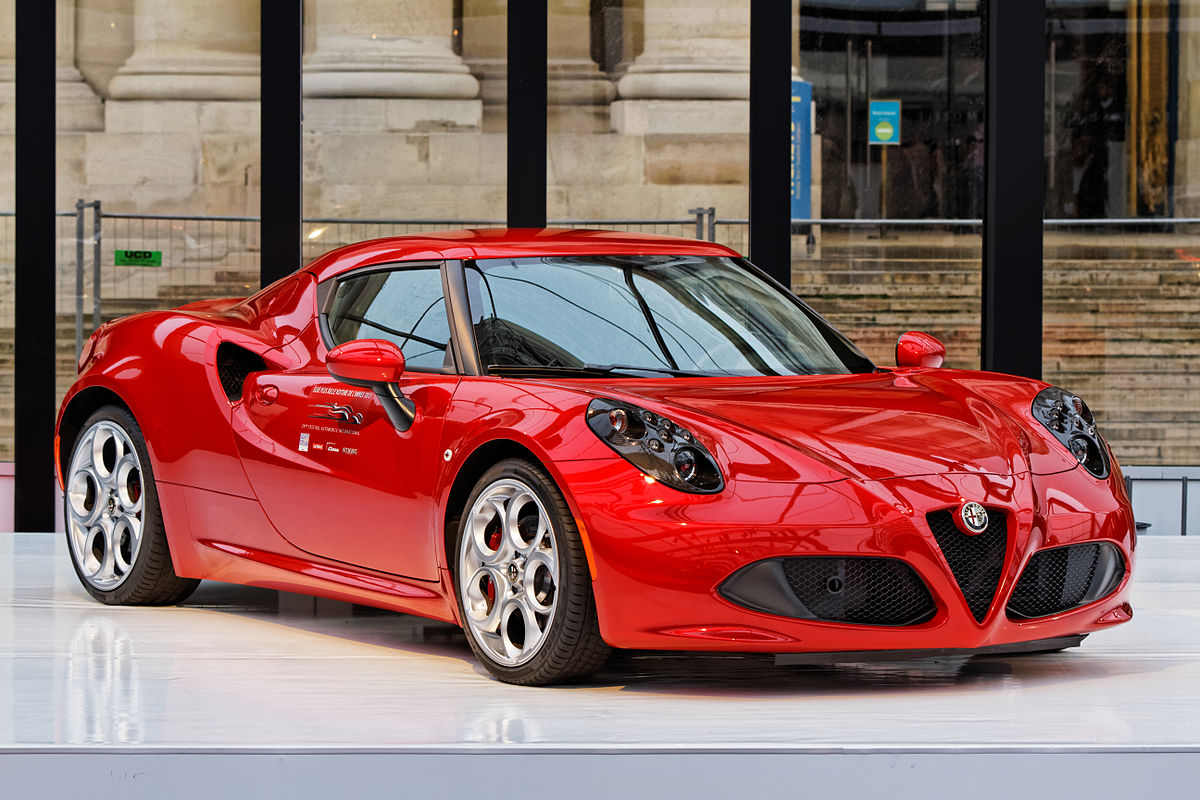

In [25]:
#### DO NOT WRITE THIS CODE , ITS FOR JUST SHOWING ALFA ROMEO CAR
from IPython import display
display.Image("./alfa romeo car.jpg")


The data is about cars and we need to predict the price of car using the above data

We will be using Decision Tree to get the price of the car.

In [4]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

dtypes gives the data type of coloumn

In [5]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In the above dataframe all the coloumns are not numeric. So we will consider only those coloumn whose values are in numeric and will make all numeric to float.

In [6]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64


Preparing the Data As with the classification task, in this section we will divide our data into attributes and labels and consequently into training and test sets. We will create 2 data set,one for price while the other (df-price). Since pur dataframe has many data in object format, for this analysis we are removing all the coloumn with object type and for all NaN value we are removig that row

In [7]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('price',axis=1)
y = df['price']

Here the X variable contains all the columns from the dataset, except 'Price' column, which is the label. The y variable contains values from the 'Price' column, which means that the X variable contains the attribute set and y variable contains the corresponding labels.

In [8]:
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,3.0,122.0,88.6,0.811148,0.890278,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,11.190476,0.0,1.0
1,3.0,122.0,88.6,0.811148,0.890278,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,11.190476,0.0,1.0
2,1.0,122.0,94.5,0.822681,0.909722,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,12.368421,0.0,1.0
3,2.0,164.0,99.8,0.848630,0.919444,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,9.791667,0.0,1.0
4,2.0,164.0,99.4,0.848630,0.922222,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,13.055556,0.0,1.0


In [9]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training SVM

In [11]:
from sklearn.svm import SVR # Support Vector Regreesion

We will create an object svr using the import function SVM.We will use the kernel as linear.

In [12]:
svr = SVR(kernel = 'linear',C = 1000)

in order to work in an efficient manner we will standardize our data.SVM works on distance of points so its necessary that all our data should be of same standard.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc= StandardScaler().fit(X_train)

In [15]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [16]:
X_train_std # To view 


array([[-0.62332705, -0.89908668,  1.3624006 , ...,  0.33506966,
         3.36269123, -3.36269123],
       [ 0.17453157,  0.77010378, -0.83980118, ..., -0.02818713,
        -0.29738086,  0.29738086],
       [-0.62332705,  1.16463971,  1.56568077, ..., -0.59901923,
         3.36269123, -3.36269123],
       ...,
       [ 0.17453157,  0.95219729, -0.83980118, ..., -0.93047013,
        -0.29738086,  0.29738086],
       [ 0.17453157, -0.56524859, -0.94144126, ..., -0.82735207,
        -0.29738086,  0.29738086],
       [-1.42118568, -1.74885637,  0.63398001, ..., -0.47216765,
        -0.29738086,  0.29738086]])

Now our data has been standarised. Let's fit model with training dataset and predict

In [17]:
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)

In [18]:
y_train_pred = svr.predict(X_train_std)

lets check our predicted values

In [19]:
print("""Actual:\t \t\tpredicted""")
for x, y in zip(y_test,y_test_pred):
    print(x, y, sep='\t\t')

Actual:	 		predicted
6295.0		5957.149668421468
10698.0		14468.920700954746
13860.0		20448.68298715055
13499.0		21478.925716031015
15750.0		20124.681077308447
8495.0		9079.703527386933
15250.0		15827.333916255542
5348.0		6005.668418635063
21105.0		16069.423470721042
6938.0		7254.923599174298
11245.0		9776.482126624693
37028.0		20670.10877046027
7995.0		12433.675814565013
7898.0		11143.006520325143
14869.0		13539.914202403037
18920.0		19226.717162767185
7129.0		6548.304521812271
15040.0		20166.244950456276
9095.0		8818.84544870034
6189.0		6470.621423390811
9495.0		12170.16325256666
11694.0		10461.813927191442
35550.0		30525.179775750665
8058.0		6766.091982677075
10795.0		13432.633053940224
32528.0		20616.74081099219
7975.0		8883.98697839876
11595.0		8581.122597151349
22018.0		14982.542912982068
32250.0		30430.16956056919
36880.0		28911.77849741941
15645.0		13980.970580036088
7898.0		7824.822856533746
17075.0		20515.3929364857
7957.0		8003.998660074036
12290.0		11357.895482765376
12170.0	

In [20]:
y_test_pred

array([ 5957.14966842, 14468.92070095, 20448.68298715, 21478.92571603,
       20124.68107731,  9079.70352739, 15827.33391626,  6005.66841864,
       16069.42347072,  7254.92359917,  9776.48212662, 20670.10877046,
       12433.67581457, 11143.00652033, 13539.9142024 , 19226.71716277,
        6548.30452181, 20166.24495046,  8818.8454487 ,  6470.62142339,
       12170.16325257, 10461.81392719, 30525.17977575,  6766.09198268,
       13432.63305394, 20616.74081099,  8883.9869784 ,  8581.12259715,
       14982.54291298, 30430.16956057, 28911.77849742, 13980.97058004,
        7824.82285653, 20515.39293649,  8003.99866007, 11357.89548277,
       13718.79721617, 16467.89155357,  9304.60919156, 18705.27852977,
        6421.02399024])

Time to check modal performance

In [21]:
from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Squared Error: 21156303.38235028
Root Mean Squared Error: 4599.598176183467


In [22]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.851046783335223

In [23]:
r2_score(y_test,y_test_pred)

0.7207836625219499

Our R sqrt score for test data is 0.72 and for train data is 0.85 which is a good value.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


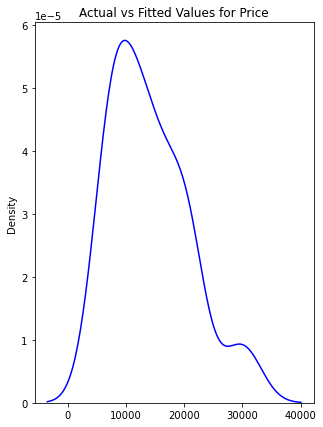

In [24]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

The above is the graph between the actual and predicted values